In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go


In [ ]:
df_hour = pd.read_csv('/content/drive/MyDrive/DataGenieHackathon/Sample Time Series/hourly/sample_1.csv' , index_col=0)
df_hour['point_timestamp'] = pd.to_datetime(df_hour['point_timestamp'])
df_hour.head()

,point_timestamp,point_value
0,2022-08-10 19:00:00,554.514832
1,2022-08-10 20:00:00,504.927783
2,2022-08-10 21:00:00,496.388722
3,2022-08-10 22:00:00,425.086839
4,2022-08-10 23:00:00,513.480670


In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 0 to 1511
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   point_timestamp  1512 non-null   datetime64[ns]
 1   point_value      1181 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 35.4 KB


In [ ]:
df_daily = pd.read_csv('/content/drive/MyDrive/DataGenieHackathon/Sample Time Series/daily/sample_1.csv' , index_col=0)
df_daily['point_timestamp'] = pd.to_datetime(df_daily['point_timestamp'])
df_daily.head()

,point_timestamp,point_value
0,2019-07-14,6
1,2019-07-15,7
2,2019-07-16,6
3,2019-07-17,6
4,2019-07-18,7


In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 744
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   point_timestamp  745 non-null    datetime64[ns]
 1   point_value      745 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.5 KB


In [ ]:
df_daily.set_index(df_daily['point_timestamp'], inplace=True)
df_daily["interpolated_value"] = df_daily['point_value'].interpolate(limit_direction='both' , method='time')

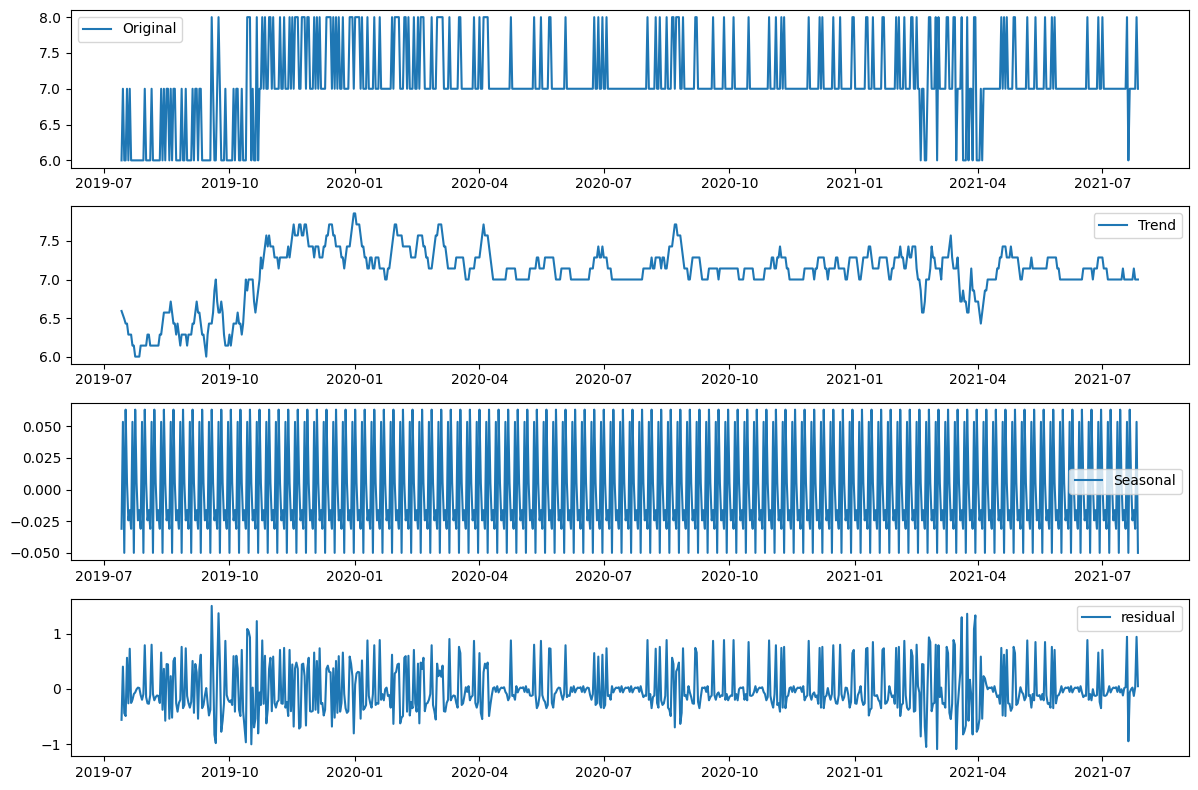

In [ ]:
result = seasonal_decompose(df_daily['interpolated_value'], model='additive' ,extrapolate_trend = 'freq')

trend = result.trend
seasonal = result.seasonal
residual = result.resid
df_daily['trend'] = trend
df_daily['seasonal'] = seasonal
df_daily['residual'] = residual

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_daily['interpolated_value'], label='Original')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(residual, label='residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
df_week = pd.read_csv('/content/drive/MyDrive/DataGenieHackathon/Sample Time Series/weekly/sample_1.csv' , index_col=0)
df_week['point_timestamp'] = pd.to_datetime(df_week['point_timestamp'])
df_week.head()

,point_timestamp,point_value
0,2021-01-11,53423552.0
1,2021-01-18,56541361.0
2,2021-01-25,55957540.0
3,2021-02-01,56278317.0
4,2021-02-08,50410674.0


In [ ]:
df_month = pd.read_csv('/content/drive/MyDrive/DataGenieHackathon/Sample Time Series/monthly/sample_0.csv' , index_col=0)
df_month['point_timestamp'] = pd.to_datetime(df_month['point_timestamp'])
df_month.head()

,point_timestamp,point_value
0,2009-01-01 00:00:00+00:00,317275
1,2009-02-01 00:00:00+00:00,262339
2,2009-03-01 00:00:00+00:00,303897
3,2009-04-01 00:00:00+00:00,285934
4,2009-05-01 00:00:00+00:00,281147


## Combine data for daily

In [ ]:
folder_path1 = "/content/drive/MyDrive/DataGenieHackathon/Sample Time Series/daily/"
frames = []

for filename in os.listdir(folder_path1):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path1, filename)
        df = pd.read_csv(file_path , index_col = 0)
        frames.append(df)

combined_df_daily = pd.concat(frames)
column_mapping = {
    'point_timestamp': 'date',
    'point_value': 'value',
}
combined_df_daily.rename(columns=column_mapping, inplace=True)
combined_df_daily['date'] = pd.to_datetime(combined_df_daily['date'])
combined_df_daily.set_index(combined_df_daily['date'], inplace=True)
combined_df_daily.sort_index(inplace=True)
combined_df_daily.rename_axis('index',inplace=True)
combined_df_daily.head()
print(len(combined_df_daily))

3442


In [ ]:
combined_df_daily.head()

,date,value
index,,
2019-07-14,2019-07-14,6.0
2019-07-15,2019-07-15,7.0
2019-07-16,2019-07-16,6.0
2019-07-17,2019-07-17,6.0
2019-07-18,2019-07-18,7.0


In [ ]:
 if combined_df_daily['value'].isnull().sum():
    combined_df_daily["value"] = combined_df_daily['value'].interpolate(limit_direction='both' , method='time')
    print("Missing value interpolated")

Missing value interpolated


In [ ]:
if combined_df_daily['date'].is_unique:
    print("All values are unique.")
else:
    # Calculate the average for duplicate values
    combined_df_daily = combined_df_daily.groupby('date').mean().reset_index()
    print("Duplicates were found and removed.")
print(len(combined_df_daily))

Duplicates were found and removed.
1299


In [ ]:
combined_df_daily.head()
print(len(combined_df_daily))

1299


In [ ]:
#combined_df_daily = combined_df_daily[combined_df_daily["date"] >= "02-01-2021"]
combined_df_daily.reset_index(drop=True, inplace=True)
combined_df_daily

,date,value
0,2019-07-14,6.0
1,2019-07-15,7.0
2,2019-07-16,6.0
3,2019-07-17,6.0
4,2019-07-18,7.0
...,...,...
1294,2023-01-28,27.0
1295,2023-01-29,153181.0
1296,2023-01-30,541232.0
1297,2023-01-31,712411.0


In [ ]:
#combined_df_daily = combined_df_daily[combined_df_daily["date"] >= "01-02-2021"]

In [ ]:
combined_df_daily.to_csv(folder_path1+'processed_daily.csv')

##Combine data for monthly

In [ ]:
folder_path2 = "/content/drive/MyDrive/DataGenieHackathon/Sample Time Series/monthly/"
frames = []

for filename in os.listdir(folder_path2):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path2, filename)
        df = pd.read_csv(file_path , index_col = 0)
        frames.append(df)

combined_df_monthly = pd.concat(frames)
column_mapping = {
    'point_timestamp': 'date',
    'point_value': 'value',
}

combined_df_monthly.rename(columns=column_mapping, inplace=True)

if combined_df_monthly['date'].is_unique:
  print("All values are unique.")
else:
  combined_df_monthly = combined_df_monthly.groupby('date').mean().reset_index()
  print("Duplicates were found and removed.")

combined_df_monthly['date'] = pd.to_datetime(combined_df_monthly['date'])
combined_df_monthly.sort_index(inplace=True)

combined_df_monthly.set_index(combined_df_monthly['date'], inplace=True)
combined_df_monthly.rename_axis('index',inplace=True)

if combined_df_monthly['value'].isnull().sum():
  combined_df_monthly["value"] = combined_df_monthly['value'].interpolate(limit_direction='both' , method='time')
  print("Missing value interpolated")


Duplicates were found and removed.


In [ ]:
combined_df_monthly.head()

,date,value
index,,
1997-01-01 00:00:00,1997-01-01 00:00:00,3.45
1997-02-01 00:00:00,1997-02-01 00:00:00,2.15
1997-03-01 00:00:00,1997-03-01 00:00:00,1.89
1997-04-01 00:00:00,1997-04-01 00:00:00,2.03
1997-05-01 00:00:00,1997-05-01 00:00:00,2.25


In [ ]:
combined_df_monthly['date'].is_unique

True

In [ ]:
combined_df_monthly.head()

,date,value
index,,
1997-01-01 00:00:00,1997-01-01 00:00:00,3.45
1997-02-01 00:00:00,1997-02-01 00:00:00,2.15
1997-03-01 00:00:00,1997-03-01 00:00:00,1.89
1997-04-01 00:00:00,1997-04-01 00:00:00,2.03
1997-05-01 00:00:00,1997-05-01 00:00:00,2.25


In [ ]:
combined_df_monthly.tail(10)

,date,value
index,,
2020-10-01 00:00:00,2020-10-01 00:00:00,2.39
2020-10-01 00:00:00+00:00,2020-10-01 00:00:00+00:00,164494.00
2020-11-01 00:00:00,2020-11-01 00:00:00,2.61
2020-11-01 00:00:00+00:00,2020-11-01 00:00:00+00:00,168655.00
2020-12-01 00:00:00,2020-12-01 00:00:00,2.59
2020-12-01 00:00:00+00:00,2020-12-01 00:00:00+00:00,178597.00
2021-01-01 00:00:00,2021-01-01 00:00:00,2.71
2021-01-01 00:00:00+00:00,2021-01-01 00:00:00+00:00,181197.00
2021-02-01 00:00:00,2021-02-01 00:00:00,5.35


In [ ]:
'''
from datetime import datetime

combined_df_monthly["date"] = pd.to_datetime(combined_df_monthly["date"],utc=True).dt.date
print(combined_df_monthly)
start_date = datetime(2009, 4, 1).date()
end_date = datetime(2021, 1, 1).date()
# Filter the DataFrame based on the datetime range
date_range_filter = (combined_df_monthly["date"] > start_date) & (combined_df_monthly["date"] < end_date)
combined_df_monthly = combined_df_monthly[date_range_filter]'''


'\nfrom datetime import datetime\n\ncombined_df_monthly["date"] = pd.to_datetime(combined_df_monthly["date"],utc=True).dt.date\nprint(combined_df_monthly)\nstart_date = datetime(2009, 4, 1).date()\nend_date = datetime(2021, 1, 1).date()\n# Filter the DataFrame based on the datetime range\ndate_range_filter = (combined_df_monthly["date"] > start_date) & (combined_df_monthly["date"] < end_date)\ncombined_df_monthly = combined_df_monthly[date_range_filter]'

In [ ]:
print(len(combined_df_monthly))

436


In [ ]:
combined_df_daily.to_csv(folder_path2+'processed_monthly.csv')

##Combine data for hourly

In [ ]:
folder_path3 = "/content/drive/MyDrive/DataGenieHackathon/Sample Time Series/hourly/"
frames = []

for filename in os.listdir(folder_path3):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path3, filename)
        df = pd.read_csv(file_path , index_col = 0)
        frames.append(df)

combined_df_hourly = pd.concat(frames)
column_mapping = {
    'point_timestamp': 'date',
    'point_value': 'value',
}

combined_df_hourly.rename(columns=column_mapping, inplace=True)
combined_df_hourly['date'] = pd.to_datetime(combined_df_daily['date'])
combined_df_hourly.set_index(combined_df_hourly['date'], inplace=True)
combined_df_hourly.sort_index(inplace=True)
combined_df_hourly.rename_axis('index',inplace=True)
combined_df_hourly.head()

,date,value
index,,
2019-07-14,2019-07-14,-92.760059
2019-07-14,2019-07-14,0.072517
2019-07-14,2019-07-14,0.000000
2019-07-14,2019-07-14,0.000000
2019-07-14,2019-07-14,554.514832


In [ ]:
if combined_df_hourly['value'].isnull().sum():
    combined_df_hourly["value"] = combined_df_hourly['value'].interpolate(method='linear')
    print("Missing value interpolated")

Missing value interpolated


In [ ]:
combined_df_hourly['date'].is_unique


False

In [ ]:
if combined_df_hourly['date'].is_unique:
    print("All values are unique.")
else:
    # Calculate the average for duplicate values
    combined_df_hourly = combined_df_hourly.groupby('date').mean().reset_index()
    print("Duplicates were found and removed.")

Duplicates were found and removed.


In [ ]:
combined_df_hourly['date'].is_unique

True

In [ ]:
combined_df_hourly.head(10)

,date,value
0,2019-07-14,46.208232
1,2019-07-15,42.350087
2,2019-07-16,42.100920
3,2019-07-17,35.985742
4,2019-07-18,43.812193
5,2019-07-19,-11.958276
6,2019-07-20,45.977633
7,2019-07-21,-7.544595
8,2019-07-22,-6.842156
9,2019-07-23,-7.044719


In [ ]:
combined_df_hourly.tail(10)

,date,value
1289,2023-01-23,552.658731
1290,2023-01-24,532.782149
1291,2023-01-25,609.989776
1292,2023-01-26,514.278456
1293,2023-01-27,619.578730
1294,2023-01-28,620.309870
1295,2023-01-29,529.461624
1296,2023-01-30,558.900464
1297,2023-01-31,555.561383
1298,2023-02-01,639.966329


In [ ]:
'''
from datetime import datetime
combined_df_hourly["date"] = pd.to_datetime(combined_df_hourly["date"],utc=True).dt.date
print(combined_df_hourly)
start_date = datetime(2022, 8, 10).date()
end_date = datetime(2022, 10, 12).date()
# Filter the DataFrame based on the datetime range
date_range_filter = (combined_df_hourly["date"] > start_date) & (combined_df_hourly["date"] < end_date)
combined_df_hourly = combined_df_hourly[date_range_filter]'''
combined_df_hourly.to_csv(folder_path3+'processed_hourly.csv' , index=False)

## Combine data for weekly

In [ ]:
folder_path4 = "/content/drive/MyDrive/DataGenieHackathon/Sample Time Series/weekly/"
frames = []

for filename in os.listdir(folder_path4):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path4, filename)
        df = pd.read_csv(file_path , index_col = 0)
        frames.append(df)

combined_df_weekly = pd.concat(frames)
column_mapping = {
    'point_timestamp': 'date',
    'point_value': 'value',
}

combined_df_weekly.rename(columns=column_mapping, inplace=True)
combined_df_weekly['date'] = pd.to_datetime(combined_df_weekly['date'])
combined_df_weekly.set_index(combined_df_weekly['date'], inplace=True)
combined_df_weekly.sort_index(inplace=True)
combined_df_weekly.rename_axis('index',inplace=True)
combined_df_weekly.head()

,date,value
index,,
2016-08-01,2016-08-01,48.329033
2016-08-01,2016-08-01,13979.000000
2016-08-08,2016-08-08,14437.000000
2016-08-08,2016-08-08,49.234187
2016-08-15,2016-08-15,14590.000000


In [ ]:
if combined_df_weekly['value'].isnull().sum():
    combined_df_weekly["value"] = combined_df_weekly['value'].interpolate(limit_direction='both' , method='time')
    print("Missing value interpolated")


Missing value interpolated


In [ ]:
combined_df_weekly['date'].is_unique


False

In [ ]:
if combined_df_weekly['date'].is_unique:
    print("All values are unique.")
else:
    # Calculate the average for duplicate values
    combined_df_weekly = combined_df_weekly.groupby('date').mean().reset_index()
    print("Duplicates were found and removed.")

Duplicates were found and removed.


In [ ]:
combined_df_weekly['date'].is_unique

True

In [ ]:
combined_df_weekly['date'].head()

0   2016-08-01
1   2016-08-08
2   2016-08-15
3   2016-08-22
4   2016-08-29
Name: date, dtype: datetime64[ns]

In [ ]:
combined_df_weekly['date'].tail()

165   2022-06-20
166   2022-06-27
167   2022-07-04
168   2022-07-11
169   2022-07-18
Name: date, dtype: datetime64[ns]

In [ ]:
'''from datetime import datetime
combined_df_weekly["date"] = pd.to_datetime(combined_df_weekly["date"],utc=True).dt.date
print(combined_df_weekly)
start_date = datetime(2021, 4, 1).date()
end_date = datetime(2022, 7, 18).date()
# Filter the DataFrame based on the datetime range
date_range_filter = (combined_df_weekly["date"] > start_date) & (combined_df_weekly["date"] < end_date)
combined_df_weekly = combined_df_weekly[date_range_filter]'''
combined_df_weekly.to_csv(folder_path4+'processed_weekly.csv' , index=False)